<a href="https://colab.research.google.com/github/ArunK-ML/Project---TripFare-Predicting-Urban-Taxi-Fare-with-Machine-Learning/blob/main/Trip_Fare_Final_ML_last1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🚗 TripFare : Predicting Urban Taxi Fare with Machine Learning**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Collection

df = pd.read_csv("/content/taxi_fare_Download.csv")
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37,2016-03-01 12:38:53,1,-73.955688,40.782261,1,N,-73.974915,40.751282,1,16.0,0.0,0.5,3.36,0.00,0.3,20.16
212341,2,2016-03-01 12:15:37,2016-03-01 12:38:22,1,-74.002197,40.715042,1,N,-73.976295,40.739609,1,15.5,0.0,0.5,2.00,0.00,0.3,18.30
212342,2,2016-03-01 12:15:37,2016-03-01 12:18:18,1,-73.991173,40.733170,1,N,-73.994324,40.728531,1,4.0,0.0,0.5,0.00,0.00,0.3,4.80
212343,1,2016-03-01 12:15:38,2016-03-01 12:22:47,2,-73.972099,40.786446,1,N,-73.955872,40.779755,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80


In [8]:
df.shape
# --------------------------
# 2. Structure & Schema
# --------------------------
print("--- Structure ---")
print(df.info())

print("\n--- Shape --- ")
print(df.shape)

print("\n--- Data Types ---")
print(df.dtypes)

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Duplicate Rows ---")
print(df.duplicated().sum())

--- Structure ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               212345 non-null  int64  
 1   tpep_pickup_datetime   212345 non-null  object 
 2   tpep_dropoff_datetime  212345 non-null  object 
 3   passenger_count        212345 non-null  int64  
 4   pickup_longitude       212345 non-null  float64
 5   pickup_latitude        212345 non-null  float64
 6   RatecodeID             212345 non-null  int64  
 7   store_and_fwd_flag     212345 non-null  object 
 8   dropoff_longitude      212345 non-null  float64
 9   dropoff_latitude       212345 non-null  float64
 10  payment_type           212345 non-null  int64  
 11  fare_amount            212345 non-null  float64
 12  extra                  212345 non-null  float64
 13  mta_tax                212345 non-null  float64
 14  tip_amount        

In [9]:
# Change dtype

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

# Calculate trip duration in minutes
df['trip_duration_min'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Binary flag for night trips (Yes if 10 PM to 5 AM)
df['pickup_is_night'] = df["tpep_pickup_datetime"].dt.hour.apply(
    lambda x: "Yes" if (x >= 22 or x <= 5) else "No"

)

# Haversine formula function
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Apply to your DataFrame
df["trip_distance_km"] = haversine_distance(
    df["pickup_latitude"],
    df["pickup_longitude"],
    df["dropoff_latitude"],
    df["dropoff_longitude"]
)


In [10]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration_min,pickup_is_night,trip_distance_km
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,9.0,0.5,0.5,2.05,0.00,0.3,12.35,7.916667,Yes,3.138096
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,11.0,0.5,0.5,3.05,0.00,0.3,15.35,11.100000,Yes,4.303331
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,54.5,0.5,0.5,8.00,0.00,0.3,63.80,31.100000,Yes,16.600142
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,31.5,0.0,0.5,3.78,5.54,0.3,41.62,0.000000,Yes,9.046547
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,98.0,0.0,0.0,0.00,15.50,0.3,113.80,0.000000,Yes,20.400022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37,2016-03-01 12:38:53,1,-73.955688,40.782261,1,N,-73.974915,40.751282,...,16.0,0.0,0.5,3.36,0.00,0.3,20.16,23.266667,No,3.806279
212341,2,2016-03-01 12:15:37,2016-03-01 12:38:22,1,-74.002197,40.715042,1,N,-73.976295,40.739609,...,15.5,0.0,0.5,2.00,0.00,0.3,18.30,22.750000,No,3.496576
212342,2,2016-03-01 12:15:37,2016-03-01 12:18:18,1,-73.991173,40.733170,1,N,-73.994324,40.728531,...,4.0,0.0,0.5,0.00,0.00,0.3,4.80,2.683333,No,0.580119
212343,1,2016-03-01 12:15:38,2016-03-01 12:22:47,2,-73.972099,40.786446,1,N,-73.955872,40.779755,...,7.0,0.0,0.5,0.00,0.00,0.3,7.80,7.150000,No,1.555737


In [11]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'trip_duration_min', 'pickup_is_night', 'trip_distance_km'],
      dtype='object')

In [12]:

# List of specific numeric columns
numeric_cols_abs = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge']

# Convert them to absolute values
df[numeric_cols_abs] = df[numeric_cols_abs].abs()

In [13]:
# Drop rows where fare_amount == 0

df = df[df['fare_amount'] > 0]

# Remove them
df = df[df['passenger_count'] > 0]

# Replace 0 with mean value
df['improvement_surcharge'] = df['improvement_surcharge'].replace(0, df['improvement_surcharge'].mean())

In [16]:
# Calculate the expected total
df['calculated_total'] = (
    df['fare_amount'] +
    df['extra'] +
    df['mta_tax'] +
    df['tip_amount'] +
    df['tolls_amount'] +
    df['improvement_surcharge']
)

# Find mismatches (allowing for floating-point tolerance)
mismatched_rows = df[~np.isclose(df['calculated_total'], df['total_amount'])]

# Store to CSV
mismatched_rows.to_csv("mismatched_rows.csv", index=False)

# Display all mismatches
print("Total mismatches found:", len(mismatched_rows))
print(mismatched_rows.to_string(index=False))

Total mismatches found: 0
Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, pickup_longitude, pickup_latitude, RatecodeID, store_and_fwd_flag, dropoff_longitude, dropoff_latitude, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, trip_duration_min, pickup_is_night, trip_distance_km, calculated_total]
Index: []


In [15]:
# Replace total_amount with calculated_total

df['total_amount'] = df['calculated_total']

In [17]:
# Drop the columns

df = df.drop(columns=['tpep_pickup_datetime','calculated_total', 'tpep_dropoff_datetime',"pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"])


In [18]:
# Count zeros and negative values in each column

# Select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Count zeros in each column
zero_count = (numeric_df == 0).sum()

# Count negative values in each column
negative_count = (numeric_df < 0).sum()

# Combine results
result = pd.DataFrame({
    'Zero_Count': zero_count,
    'Negative_Count': negative_count
})

print(result)

                       Zero_Count  Negative_Count
VendorID                        0               0
passenger_count                 0               0
RatecodeID                      0               0
payment_type                    0               0
fare_amount                     0               0
extra                      191874               0
mta_tax                       741               0
tip_amount                  73487               0
tolls_amount               200675               0
improvement_surcharge           0               0
total_amount                    0               0
trip_duration_min             126               1
trip_distance_km             2975               0


In [ ]:
df.to_csv("taxi_fare_no.csv", index=False)

In [19]:
df.dtypes

,0
VendorID,int64
passenger_count,int64
RatecodeID,int64
store_and_fwd_flag,object
payment_type,int64
fare_amount,float64
extra,float64
mta_tax,float64
tip_amount,float64
tolls_amount,float64


In [20]:
# ---- 11. Trip distance ----
# Keep only trip distances > 0 and <= 50, else set NaN
df.loc[(df['trip_distance_km'] <= 0) | (df['trip_distance_km'] > 50), 'trip_distance_km'] = np.nan

In [26]:
# ---- 12. Trip duration ----
df.loc[(df['trip_duration_min'] <= 0) | (df['trip_duration_min'] > 300), 'trip_duration_min'] = np.nan

In [28]:
# Show rows where trip_duration is greater than 4000
df[df['trip_duration_min'] > 300]

,VendorID,passenger_count,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration_min,pickup_is_night,trip_distance_km


In [29]:
import numpy as np

# ---- 1. Convert categorical-like numeric columns ----
# Convert to category AFTER handling outliers if necessary
df['VendorID'] = df['VendorID'].astype('category')
df['payment_type'] = df['payment_type'].astype('category')
df['RatecodeID'] = df['RatecodeID'].astype('category')
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')
df['pickup_is_night'] = df['pickup_is_night'].astype('category')
df["passenger_count"] = df["passenger_count"].astype('category')



In [30]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Count zeros in each column
zero_count = (numeric_df == 0).sum()

# Count negative values in each column
negative_count = (numeric_df < 0).sum()

# Combine results
result = pd.DataFrame({
    'Zero_Count': zero_count,
    'Negative_Count': negative_count
})

print(result)

                       Zero_Count  Negative_Count
fare_amount                     0               0
extra                      191874               0
mta_tax                       741               0
tip_amount                  73487               0
tolls_amount               200675               0
improvement_surcharge           0               0
total_amount                    0               0
trip_duration_min               0               0
trip_distance_km                0               0


In [31]:
df

,VendorID,passenger_count,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration_min,pickup_is_night,trip_distance_km
0,1,1,1,N,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,7.916667,Yes,3.138096
1,1,1,1,N,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,11.100000,Yes,4.303331
2,2,2,1,N,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,31.100000,Yes,16.600142
3,2,3,1,N,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,NaN,Yes,9.046547
4,2,5,3,N,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,NaN,Yes,20.400022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,1,1,N,1,16.0,0.0,0.5,3.36,0.00,0.3,20.16,23.266667,No,3.806279
212341,2,1,1,N,1,15.5,0.0,0.5,2.00,0.00,0.3,18.30,22.750000,No,3.496576
212342,2,1,1,N,1,4.0,0.0,0.5,0.00,0.00,0.3,4.80,2.683333,No,0.580119
212343,1,2,1,N,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80,7.150000,No,1.555737


In [38]:
df.duplicated().sum()

np.int64(0)

In [33]:
df.isna().sum()

,0
VendorID,0
passenger_count,0
RatecodeID,0
store_and_fwd_flag,0
payment_type,0
fare_amount,0
extra,0
mta_tax,0
tip_amount,0
tolls_amount,0


In [34]:
df = df.dropna()

In [35]:
df.isnull().sum()

,0
VendorID,0
passenger_count,0
RatecodeID,0
store_and_fwd_flag,0
payment_type,0
fare_amount,0
extra,0
mta_tax,0
tip_amount,0
tolls_amount,0


In [37]:
# Drop duplicate rows
df = df.drop_duplicates()

# Optional: reset index after dropping duplicates
df = df.reset_index(drop=True)

In [39]:
df.dtypes

,0
VendorID,category
passenger_count,category
RatecodeID,category
store_and_fwd_flag,category
payment_type,category
fare_amount,float64
extra,float64
mta_tax,float64
tip_amount,float64
tolls_amount,float64


In [41]:
df.shape

(208438, 15)

In [42]:
df

,VendorID,passenger_count,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration_min,pickup_is_night,trip_distance_km
0,1,1,1,N,1,9.0,0.5,0.5,2.05,0.0,0.3,12.35,7.916667,Yes,3.138096
1,1,1,1,N,1,11.0,0.5,0.5,3.05,0.0,0.3,15.35,11.100000,Yes,4.303331
2,2,2,1,N,1,54.5,0.5,0.5,8.00,0.0,0.3,63.80,31.100000,Yes,16.600142
3,1,1,1,N,3,20.5,0.5,0.5,0.00,0.0,0.3,21.80,16.050000,Yes,7.950066
4,1,1,1,N,1,5.5,0.5,0.5,2.00,0.0,0.3,8.80,4.983333,Yes,0.837395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208433,2,1,1,N,1,16.0,0.0,0.5,3.36,0.0,0.3,20.16,23.266667,No,3.806279
208434,2,1,1,N,1,15.5,0.0,0.5,2.00,0.0,0.3,18.30,22.750000,No,3.496576
208435,2,1,1,N,1,4.0,0.0,0.5,0.00,0.0,0.3,4.80,2.683333,No,0.580119
208436,1,2,1,N,2,7.0,0.0,0.5,0.00,0.0,0.3,7.80,7.150000,No,1.555737


# **Outliers Handle**

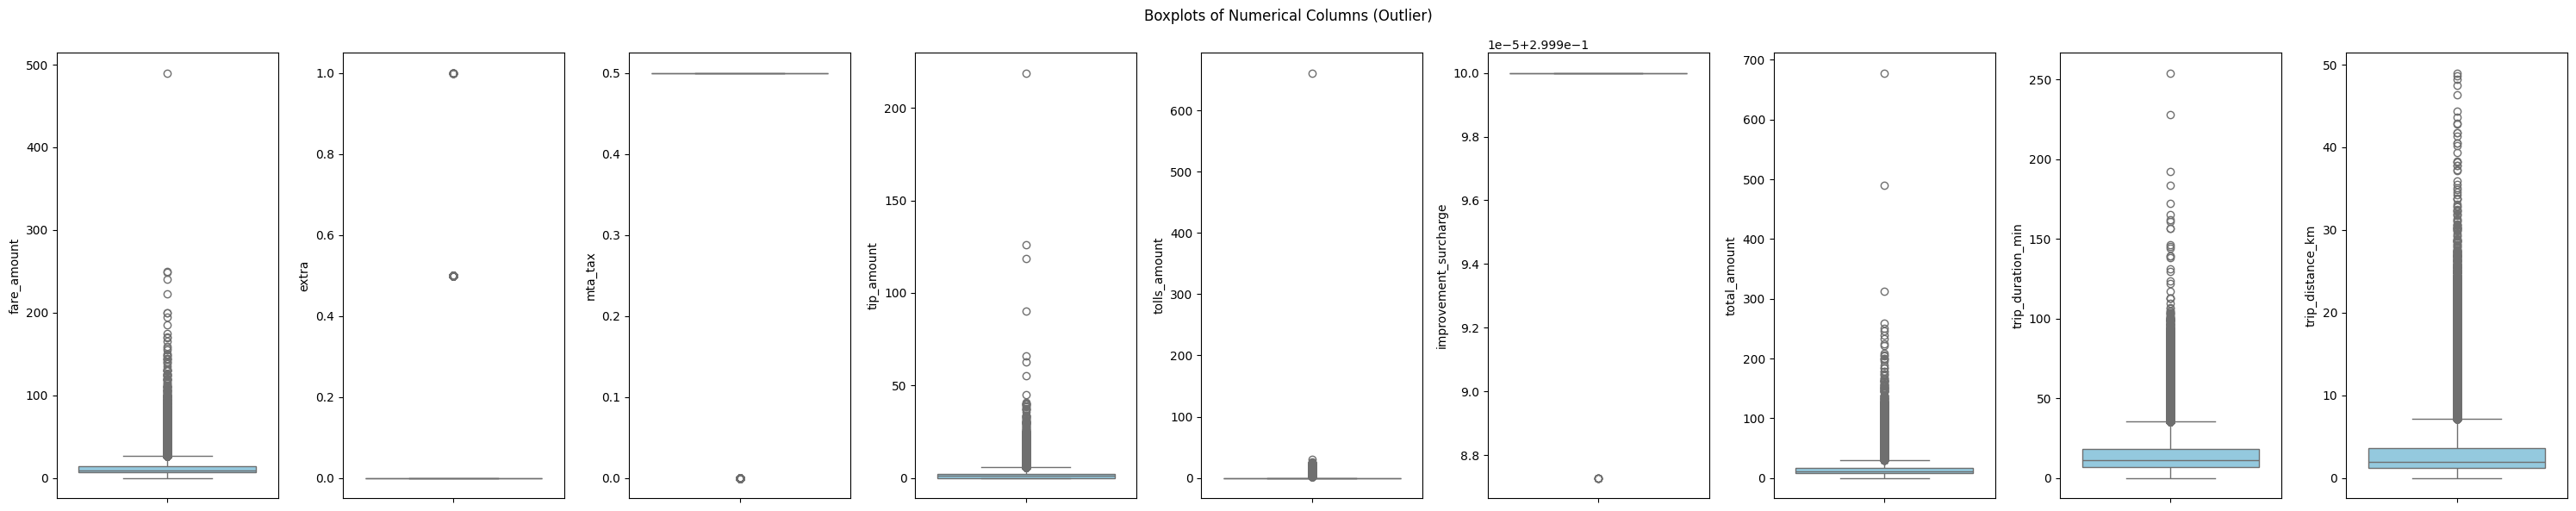

In [40]:
numerical_cols = df.select_dtypes(exclude=['object' ,"category"]).columns

# Loop through numerical columns and create boxplots

plt.figure(figsize=(30, 6))
plt.suptitle('Boxplots of Numerical Columns (Outlier)')
for i in range(0, len(numerical_cols)):  # Limit to a maximum of 4 columns
    plt.subplot(1, len(numerical_cols), i+1)
    sns.boxplot(y=df[numerical_cols[i]],color='skyblue',)
    plt.tight_layout()
plt.show()

In [43]:

# --------------------
# 2. Select Numeric Columns
# --------------------
numeric_cols = df.select_dtypes(include=['number']).columns

# --------------------
# 3. Function to Check Skewness
# --------------------
def check_skewness(data, cols):
    skewness = data[cols].skew().sort_values(ascending=False)
    return skewness

print("📊 Skewness BEFORE handling outliers:")
print(check_skewness(df, numeric_cols))

# --------------------
# 4. Outlier Handling (Option: Remove or Cap)
# --------------------
method = "cap"  # change to "remove" if you want to delete rows

df_no_outliers = df.copy()

if method == "remove":
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mask = ~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)
    df_no_outliers = df[mask]

elif method == "cap":
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_no_outliers[col] = np.where(df_no_outliers[col] < lower_bound, lower_bound, df_no_outliers[col])
        df_no_outliers[col] = np.where(df_no_outliers[col] > upper_bound, upper_bound, df_no_outliers[col])

# --------------------
# 5. Report
# --------------------
print(f"\nOriginal shape: {df.shape}")
print(f"After handling outliers: {df_no_outliers.shape}")
if method == "remove":
    loss_percent = (1 - len(df_no_outliers) / len(df)) * 100
    print(f"⚠ Data loss: {loss_percent:.2f}%")

# --------------------
# 6. Skewness After Handling Outliers
# --------------------
print("\n📊 Skewness AFTER handling outliers:")
print(check_skewness(df_no_outliers, numeric_cols))

# --------------------
# 7. Save Clean Data
# --------------------
df_no_outliers.to_csv("taxi_fare_no_outliers.csv", index=False)
print("\n✅ Cleaned data saved as 'taxi_fare_no_outliers.csv'")


📊 Skewness BEFORE handling outliers:
tolls_amount             166.051652
tip_amount                 7.540451
total_amount               3.960393
fare_amount                3.516721
trip_distance_km           3.033388
extra                      2.754616
trip_duration_min          2.286428
mta_tax                  -18.253715
improvement_surcharge   -186.379094
dtype: float64

Original shape: (208438, 15)
After handling outliers: (208438, 15)

📊 Skewness AFTER handling outliers:
trip_distance_km         1.096361
fare_amount              1.079285
tip_amount               1.065750
total_amount             1.036639
trip_duration_min        0.959882
tolls_amount             0.000000
mta_tax                  0.000000
extra                    0.000000
improvement_surcharge    0.000000
dtype: float64

✅ Cleaned data saved as 'taxi_fare_no_outliers.csv'


In [44]:
df_no_outliers.shape

(208438, 15)

In [45]:
df_no_outliers.isna().sum()

,0
VendorID,0
passenger_count,0
RatecodeID,0
store_and_fwd_flag,0
payment_type,0
fare_amount,0
extra,0
mta_tax,0
tip_amount,0
tolls_amount,0


In [46]:
df_no_outliers.duplicated().sum()

np.int64(8833)

In [52]:
# Select only numeric columns
numeric_df = df_no_outliers.select_dtypes(include=np.number)

# Count zeros in each column
zero_count = (numeric_df == 0).sum()

# Count negative values in each column
negative_count = (numeric_df < 0).sum()

# Combine results
result = pd.DataFrame({
    'Zero_Count': zero_count,
    'Negative_Count': negative_count
})

print(result)

                       Zero_Count  Negative_Count
fare_amount                     0               0
extra                      208438               0
mta_tax                         0               0
tip_amount                  71823               0
tolls_amount               208438               0
improvement_surcharge           0               0
total_amount                    0               0
trip_duration_min               0               0
trip_distance_km                0               0


In [47]:
df_cleaned = df_no_outliers.copy()

# **Skeness Handle**

In [48]:
df_cleaned.columns

Index(['VendorID', 'passenger_count', 'RatecodeID', 'store_and_fwd_flag',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'trip_duration_min', 'pickup_is_night', 'trip_distance_km'],
      dtype='object')

In [53]:
df_cleaned.shape

(208438, 15)

In [54]:
# --------------------------
# Distribution & Skewness
# --------------------------

# Step 1: Select numeric columns
numeric_cols = df_cleaned.select_dtypes(include=np.number).columns

# Step 2: Loop through numeric columns
for col in numeric_cols:
    skew_val = df_cleaned[col].skew()
    kurt_val = df_cleaned[col].kurtosis()

    print(f"\nColumn: {col}")
    print(f"  Skewness: {skew_val:.3f}")
    print(f"  Kurtosis: {kurt_val:.3f}")

    # Step 3: Apply normality check thresholds
    if skew_val < 0.5 and skew_val > -0.5 and kurt_val < 3 and kurt_val > -3:
        print("  ✅ Looks approximately normal")
    else:
        print("  ⚠ Not normal (may need transformation)")


Column: fare_amount
  Skewness: 1.079
  Kurtosis: 0.152
  ⚠ Not normal (may need transformation)

Column: extra
  Skewness: 0.000
  Kurtosis: 0.000
  ✅ Looks approximately normal

Column: mta_tax
  Skewness: 0.000
  Kurtosis: 0.000
  ✅ Looks approximately normal

Column: tip_amount
  Skewness: 1.066
  Kurtosis: 0.502
  ⚠ Not normal (may need transformation)

Column: tolls_amount
  Skewness: 0.000
  Kurtosis: 0.000
  ✅ Looks approximately normal

Column: improvement_surcharge
  Skewness: 0.000
  Kurtosis: 0.000
  ✅ Looks approximately normal

Column: total_amount
  Skewness: 1.037
  Kurtosis: 0.048
  ⚠ Not normal (may need transformation)

Column: trip_duration_min
  Skewness: 0.960
  Kurtosis: 0.152
  ⚠ Not normal (may need transformation)

Column: trip_distance_km
  Skewness: 1.096
  Kurtosis: 0.008
  ⚠ Not normal (may need transformation)


In [55]:
# -----------------------------
# Handle Skewness with Yeo–Johnson
# -----------------------------
from sklearn.preprocessing import PowerTransformer
import numpy as np

def fix_skewness(df_cleaned, threshold=0.5):
    # Make a copy to avoid SettingWithCopyWarning
    df_transformed = df_cleaned.copy()

    # Select numeric columns
    numeric_cols = df_transformed.select_dtypes(include=[np.number]).columns

    # Calculate skewness
    skewness = df_transformed[numeric_cols].skew()

    # Identify skewed columns
    skewed_cols = skewness[abs(skewness) > threshold].index.tolist()

    print("\n📊 Skewness BEFORE transformation:")
    print(skewness)

    # Apply Yeo-Johnson transformation to skewed columns
    if skewed_cols:
        pt = PowerTransformer(method='yeo-johnson')
        df_transformed[skewed_cols] = pt.fit_transform(df_transformed[skewed_cols])
        print("\n✅ Applied Yeo–Johnson to:", skewed_cols)

        print("\n📊 Skewness AFTER transformation:")
        print(df_transformed[skewed_cols].skew())
    else:
        print("\nNo columns required transformation.")

    return df_transformed

# ✅ Correct example usage
df_clean = fix_skewness(df_cleaned, threshold=0.5)



📊 Skewness BEFORE transformation:
fare_amount              1.079285
extra                    0.000000
mta_tax                  0.000000
tip_amount               1.065750
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             1.036639
trip_duration_min        0.959882
trip_distance_km         1.096361
dtype: float64

✅ Applied Yeo–Johnson to: ['fare_amount', 'tip_amount', 'total_amount', 'trip_duration_min', 'trip_distance_km']

📊 Skewness AFTER transformation:
fare_amount          0.033149
tip_amount           0.027365
total_amount         0.033556
trip_duration_min   -0.018243
trip_distance_km     0.054686
dtype: float64


In [56]:
# --------------------------
# Check Again Distribution & Skewness
# --------------------------

# Step 1: Select numeric columns
numeric_cols = df_clean.select_dtypes(include=np.number).columns

# Step 2: Loop through numeric columns
for col in numeric_cols:
    skew_val = df_clean[col].skew()
    kurt_val = df_clean[col].kurtosis()

    print(f"\nColumn: {col}")
    print(f"  Skewness: {skew_val:.3f}")
    print(f"  Kurtosis: {kurt_val:.3f}")

    # Step 3: Apply normality check thresholds
    if skew_val < 0.5 and skew_val > -0.5 and kurt_val < 3 and kurt_val > -3:
        print("  ✅ Looks approximately normal")
    else:
        print("  ⚠ Not normal (may need transformation)")


Column: fare_amount
  Skewness: 0.033
  Kurtosis: -0.645
  ✅ Looks approximately normal

Column: extra
  Skewness: 0.000
  Kurtosis: 0.000
  ✅ Looks approximately normal

Column: mta_tax
  Skewness: 0.000
  Kurtosis: 0.000
  ✅ Looks approximately normal

Column: tip_amount
  Skewness: 0.027
  Kurtosis: -1.268
  ✅ Looks approximately normal

Column: tolls_amount
  Skewness: 0.000
  Kurtosis: 0.000
  ✅ Looks approximately normal

Column: improvement_surcharge
  Skewness: 0.000
  Kurtosis: 0.000
  ✅ Looks approximately normal

Column: total_amount
  Skewness: 0.034
  Kurtosis: -0.673
  ✅ Looks approximately normal

Column: trip_duration_min
  Skewness: -0.018
  Kurtosis: -0.539
  ✅ Looks approximately normal

Column: trip_distance_km
  Skewness: 0.055
  Kurtosis: -0.729
  ✅ Looks approximately normal


In [58]:
# Select only numeric columns
numeric_df = df_clean.select_dtypes(include=np.number)

# Count zeros in each column
zero_count = (numeric_df == 0).sum()

# Count negative values in each column
negative_count = (numeric_df < 0).sum()

# Combine results
result = pd.DataFrame({
    'Zero_Count': zero_count,
    'Negative_Count': negative_count
})

print(result)

                       Zero_Count  Negative_Count
fare_amount                     0          109624
extra                      208438               0
mta_tax                         0               0
tip_amount                      0           93903
tolls_amount               208438               0
improvement_surcharge           0               0
total_amount                    0          110153
trip_duration_min               0          106035
trip_distance_km                0          110347


In [59]:
df_clean.duplicated().sum()

np.int64(8836)

In [60]:
df_clean.isna().sum()

,0
VendorID,0
passenger_count,0
RatecodeID,0
store_and_fwd_flag,0
payment_type,0
fare_amount,0
extra,0
mta_tax,0
tip_amount,0
tolls_amount,0


In [ ]:
df_clean.reset_index(drop=True, inplace=True)

In [61]:
df_clean

,VendorID,passenger_count,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration_min,pickup_is_night,trip_distance_km
0,1,1,1,N,1,-0.126243,0.0,0.5,0.581101,0.0,0.3,0.084661,-0.516724,Yes,0.569894
1,1,1,1,N,1,0.247534,0.0,0.5,1.006522,0.0,0.3,0.507204,-0.047713,Yes,0.999638
2,2,2,1,N,1,1.724081,0.0,0.5,1.772921,0.0,0.3,1.710770,1.621527,Yes,1.657409
3,1,1,1,N,3,1.321396,0.0,0.5,-1.218032,0.0,0.3,1.147960,0.508388,Yes,1.657409
4,1,1,1,N,1,-1.089936,0.0,0.5,0.555917,0.0,0.3,-0.610319,-1.094772,Yes,-1.169794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208433,2,1,1,N,1,0.910132,0.0,0.5,1.115143,0.0,0.3,1.009535,1.114862,No,0.834185
208434,2,1,1,N,1,0.855866,0.0,0.5,0.555917,0.0,0.3,0.834678,1.076853,No,0.718505
208435,2,1,1,N,1,-1.737108,0.0,0.5,-1.218032,0.0,0.3,-1.944482,-1.747915,No,-1.558946
208436,1,2,1,N,2,-0.610756,0.0,0.5,-1.218032,0.0,0.3,-0.867532,-0.650362,No,-0.395022


# **Check Scaler**

In [62]:
from sklearn.preprocessing import StandardScaler

def check_scaler(df, numeric_cols):
    print("=== Before Scaling ===")
    print(df[numeric_cols].agg(['mean', 'std']).round(3))

    scaler = StandardScaler()
    df_scaled = df.copy()
    df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

    print("\n=== After Scaling ===")
    print(df_scaled[numeric_cols].agg(['mean', 'std']).round(3))

# Example usage
numeric_cols = df_clean.select_dtypes(include=['number']).columns
check_scaler(df_clean, numeric_cols)

=== Before Scaling ===
      fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
mean          0.0    0.0      0.5        -0.0           0.0   
std           1.0    0.0      0.0         1.0           0.0   

      improvement_surcharge  total_amount  trip_duration_min  trip_distance_km  
mean                    0.3          -0.0               -0.0              -0.0  
std                     0.0           1.0                1.0               1.0  

=== After Scaling ===
      fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
mean         -0.0    0.0      0.0         0.0           0.0   
std           1.0    0.0      0.0         1.0           0.0   

      improvement_surcharge  total_amount  trip_duration_min  trip_distance_km  
mean                    0.0          -0.0               -0.0              -0.0  
std                     0.0           1.0                1.0               1.0  


In [65]:
df_clean.duplicated().sum()

np.int64(8836)

In [66]:
# Drop duplicates, keeping the first occurrence
df_clean = df_clean.drop_duplicates(keep='first')
print("New shape after removing duplicates:", df_clean.shape)

New shape after removing duplicates: (199602, 15)


In [67]:
df_clean.duplicated().sum()

np.int64(0)

# **Encoding**

In [68]:
df_clean

,VendorID,passenger_count,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration_min,pickup_is_night,trip_distance_km
0,1,1,1,N,1,-0.126243,0.0,0.5,0.581101,0.0,0.3,0.084661,-0.516724,Yes,0.569894
1,1,1,1,N,1,0.247534,0.0,0.5,1.006522,0.0,0.3,0.507204,-0.047713,Yes,0.999638
2,2,2,1,N,1,1.724081,0.0,0.5,1.772921,0.0,0.3,1.710770,1.621527,Yes,1.657409
3,1,1,1,N,3,1.321396,0.0,0.5,-1.218032,0.0,0.3,1.147960,0.508388,Yes,1.657409
4,1,1,1,N,1,-1.089936,0.0,0.5,0.555917,0.0,0.3,-0.610319,-1.094772,Yes,-1.169794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208433,2,1,1,N,1,0.910132,0.0,0.5,1.115143,0.0,0.3,1.009535,1.114862,No,0.834185
208434,2,1,1,N,1,0.855866,0.0,0.5,0.555917,0.0,0.3,0.834678,1.076853,No,0.718505
208435,2,1,1,N,1,-1.737108,0.0,0.5,-1.218032,0.0,0.3,-1.944482,-1.747915,No,-1.558946
208436,1,2,1,N,2,-0.610756,0.0,0.5,-1.218032,0.0,0.3,-0.867532,-0.650362,No,-0.395022


In [69]:
for col in df_clean.select_dtypes(include='category').columns:
    unique_vals = df_clean[col].unique()
    print(f"{col} --> {unique_vals[:10]}{'...' if len(unique_vals) > 10 else ''} (Total unique: {len(unique_vals)})")

VendorID --> [1, 2]
Categories (2, int64): [1, 2] (Total unique: 2)
passenger_count --> [1, 2, 3, 5, 4, 6]
Categories (6, int64): [1, 2, 3, 4, 5, 6] (Total unique: 6)
RatecodeID --> [1, 2, 5, 3, 4, 6, 99]
Categories (7, int64): [1, 2, 3, 4, 5, 6, 99] (Total unique: 7)
store_and_fwd_flag --> ['N', 'Y']
Categories (2, object): ['N', 'Y'] (Total unique: 2)
payment_type --> [1, 3, 2, 4]
Categories (4, int64): [1, 2, 3, 4] (Total unique: 4)
pickup_is_night --> ['Yes', 'No']
Categories (2, object): ['No', 'Yes'] (Total unique: 2)


In [70]:
from sklearn.preprocessing import OrdinalEncoder

# Encode 'store_and_fwd_flag': N=0, Y=1
encoder_flag = OrdinalEncoder(categories=[["N", "Y"]])
df_clean['store_and_fwd_flag'] = encoder_flag.fit_transform(df_clean[['store_and_fwd_flag']]).astype(int)

# Encode 'pickup_is_night': Yes=0, No=1
encoder_night = OrdinalEncoder(categories=[["Yes", "No"]])
df_clean['pickup_is_night'] = encoder_night.fit_transform(df_clean[['pickup_is_night']]).astype(int)

# Check result
print(df_clean[['store_and_fwd_flag', 'pickup_is_night']].head())

df_clean['VendorID'] = df_clean['VendorID'].astype(int)
df_clean['payment_type'] = df_clean['payment_type'].astype(int)
df_clean["passenger_count"] = df_clean["passenger_count"].astype(int)


   store_and_fwd_flag  pickup_is_night
0                   0                0
1                   0                0
2                   0                0
3                   0                0
4                   0                0


/tmp/ipython-input-2049876353.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['store_and_fwd_flag'] = encoder_flag.fit_transform(df_clean[['store_and_fwd_flag']]).astype(int)
/tmp/ipython-input-2049876353.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['pickup_is_night'] = encoder_night.fit_transform(df_clean[['pickup_is_night']]).astype(int)
/tmp/ipython-input-2049876353.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [74]:
df_clean.to_csv('df_clean_mindover.csv', index=False)

In [71]:
df_clean

,VendorID,passenger_count,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration_min,pickup_is_night,trip_distance_km
0,1,1,1,0,1,-0.126243,0.0,0.5,0.581101,0.0,0.3,0.084661,-0.516724,0,0.569894
1,1,1,1,0,1,0.247534,0.0,0.5,1.006522,0.0,0.3,0.507204,-0.047713,0,0.999638
2,2,2,1,0,1,1.724081,0.0,0.5,1.772921,0.0,0.3,1.710770,1.621527,0,1.657409
3,1,1,1,0,3,1.321396,0.0,0.5,-1.218032,0.0,0.3,1.147960,0.508388,0,1.657409
4,1,1,1,0,1,-1.089936,0.0,0.5,0.555917,0.0,0.3,-0.610319,-1.094772,0,-1.169794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208433,2,1,1,0,1,0.910132,0.0,0.5,1.115143,0.0,0.3,1.009535,1.114862,1,0.834185
208434,2,1,1,0,1,0.855866,0.0,0.5,0.555917,0.0,0.3,0.834678,1.076853,1,0.718505
208435,2,1,1,0,1,-1.737108,0.0,0.5,-1.218032,0.0,0.3,-1.944482,-1.747915,1,-1.558946
208436,1,2,1,0,2,-0.610756,0.0,0.5,-1.218032,0.0,0.3,-0.867532,-0.650362,1,-0.395022


In [72]:
df_clean.dtypes

,0
VendorID,int64
passenger_count,int64
RatecodeID,category
store_and_fwd_flag,int64
payment_type,int64
fare_amount,float64
extra,float64
mta_tax,float64
tip_amount,float64
tolls_amount,float64


# **Correlation**

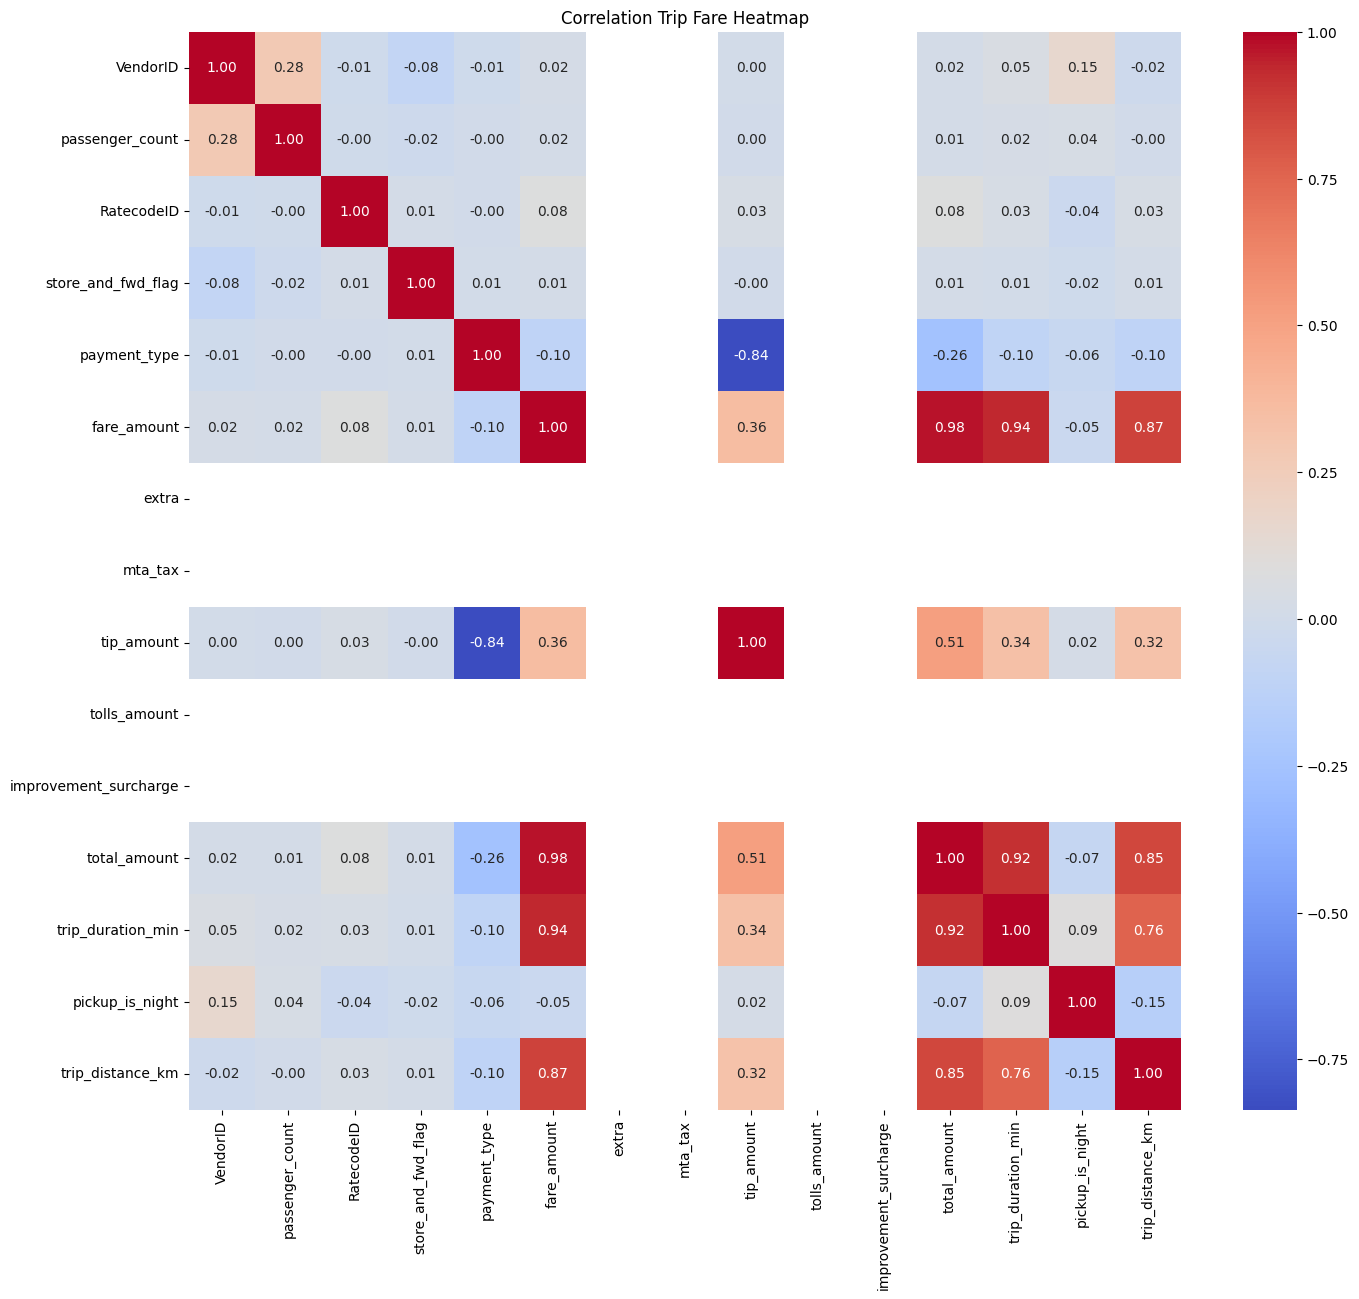

In [73]:
# -----------------------------------------------------------------------------
#                               Correlation Test
# ---------------------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------------------
# Calculate correlation for Trip Fare
# ----------------------------------------
corr = df_clean.corr()

# Plot heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Trip Fare Heatmap")
plt.show()


# **Hypothesis testing**

In [75]:
df_clean.columns

Index(['VendorID', 'passenger_count', 'RatecodeID', 'store_and_fwd_flag',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'trip_duration_min', 'pickup_is_night', 'trip_distance_km'],
      dtype='object')

In [76]:
continuous = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
               'improvement_surcharge', 'total_amount', 'trip_duration_min','trip_distance_km']

category = ['VendorID', 'passenger_count','RatecodeID', 'store_and_fwd_flag', 'payment_type','pickup_is_night']


In [77]:

from scipy import stats

#continious vs continious
def two_sample(d1,d2):
  t=0
  f=0
  for i in  range(31):
    sample1=d1.sample(frac=0.03)
    sample2=d2.sample(frac=0.03)
    t_test,p_value=stats.ttest_ind(sample1,sample2)
    if p_value < 0.1:
      f=f+1
    else:
      t=t+1
  if t>f:
    return True
  else:
    return False

#cat vs cat
def chisquare_cat_vs_cat(d1,d2):
    return True if stats.chi2_contingency(pd.crosstab(d1,d2))[1] < 0.1 else False

#continious(d1) vs cat(d2)
def annova_test(d1,d2):
    group= df[d2].unique()
    data = {}
    for i in group:
        # Check if the category has more than one data point
        if len(df[d1][df[d2]==i]) > 1:
            data[i]=df[d1][df[d2]==i]
    # Check if there are at least two groups with more than one data point
    if len(data) < 2:
        return False  # Cannot perform ANOVA with less than two groups
    f_value,p_value=stats.f_oneway(*[i for i in data.values()])
    return False if p_value < 0.1 else True

final = {}
for i in df.columns:
    final[i]={}
    for j in df.columns:
        if (i in continuous) and (j in continuous):
            result=two_sample(df[i],df[j])
        elif (i in continuous) and (j in category):
            result=annova_test(i,j)
        elif (i in category) and (j in continuous):
            result=annova_test(j,i)
        elif (i in category) and (j in category):
            result=chisquare_cat_vs_cat(df[i],df[j])
        if result:
            final[i][j]=1
        else:
            final[i][j]=0

final_df = pd.DataFrame(final)
final_df

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,VendorID,passenger_count,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration_min,pickup_is_night,trip_distance_km
VendorID,1,1,1,1,1,0,0,0,0,0,1,0,0,1,1
passenger_count,1,1,1,1,1,0,0,1,0,0,1,0,0,1,0
RatecodeID,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0
store_and_fwd_flag,1,1,1,1,1,0,0,0,0,0,1,0,0,1,0
payment_type,1,1,1,1,1,0,0,0,0,0,1,0,0,1,0
fare_amount,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
extra,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
mta_tax,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
tip_amount,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
tolls_amount,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0


<Axes: >

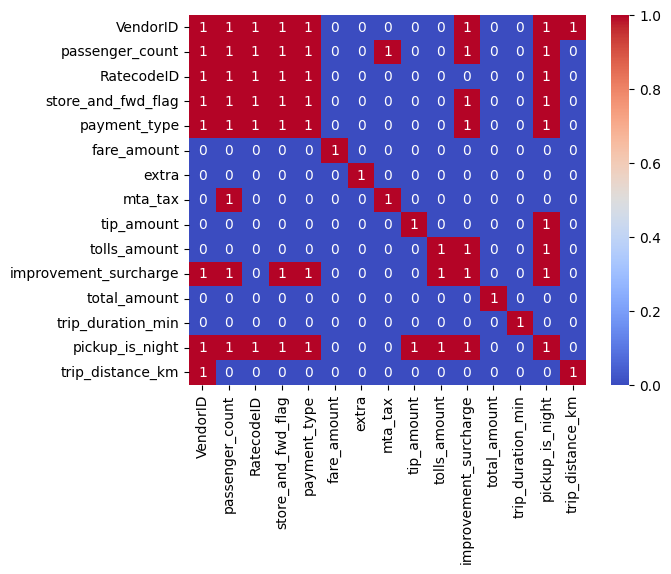

In [78]:
import seaborn as sns
sns.heatmap(final_df,annot=True,cmap="coolwarm")

# **Train the model ML**

In [79]:
y = df_clean['total_amount']
x = df_clean.drop('total_amount',axis=1)

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((159681, 14), (39921, 14), (159681,), (39921,))

In [82]:
# Step 1
# Check for infinite values in x_train

# Select only numerical columns
numeric_cols = x_train.select_dtypes(include=np.number).columns

# Check for infinite values in numerical columns
print(x_train[numeric_cols].columns[np.isinf(x_train[numeric_cols]).any()])

Index([], dtype='object')


In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score


model = RandomForestRegressor().fit(x_train,y_train)
y_pred = model.predict(x_test)

print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.0033644873620346147
0.006861580795773757
0.0013830678586685353
0.9984745027491839


In [86]:
df_clean.columns

Index(['VendorID', 'passenger_count', 'RatecodeID', 'store_and_fwd_flag',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'trip_duration_min', 'pickup_is_night', 'trip_distance_km'],
      dtype='object')

In [90]:
input_data = {
    'VendorID': 1,
    'passenger_count': 2,
    'RatecodeID': 1,
    'store_and_fwd_flag': 0,        # 'N' -> 0, 'Y' -> 1
    'payment_type': 1,
    'extra': 0.5,
    'mta_tax': 0.5,
    'tip_amount': 1.0,
    'tolls_amount': 0.0,
    'improvement_surcharge': 0.3,
    'trip_distance_km': 1.2,       # 'No' -> 0, 'Yes' -> 1
    'trip_duration_min': 15,
    'fare_amount': 0.0, # Added fare_amount
    'pickup_is_night': 0 # Added pickup_is_night
}
input_df = pd.DataFrame([input_data])

# Reorder columns to match the training data
input_df = input_df[x_train.columns]

# Predict total_amount
predicted_fare = model.predict(input_df)

print(f"Predicted total_amount: {predicted_fare[0]}")

Predicted total_amount: 0.23970207303546734


In [92]:
input_data = {
    'VendorID': 2,
    'passenger_count': 6,
    'RatecodeID': 3,
    'store_and_fwd_flag': 0,        # 'N' -> 0, 'Y' -> 1
    'payment_type': 2,
    'extra': 0,
    'mta_tax': 0.5,
    'tip_amount': -1.218,
    'tolls_amount': 0,
    'improvement_surcharge': 0.3,
    'trip_distance_km': 1.71,
    'trip_duration_min': 1.55,
    'fare_amount': 1.72, # Added fare_amount
    'pickup_is_night': 1 # Added pickup_is_night
}
input_df = pd.DataFrame([input_data])

# Reorder columns to match the training data
input_df = input_df[x_train.columns]

# Predict total_amount
predicted_fare = model.predict(input_df)

print(f"Predicted total_amount: {predicted_fare[0]}")

Predicted total_amount: 1.7107699452824547


In [99]:
input_data = {
    'VendorID': 2,
    'passenger_count': 3,
    'RatecodeID': 3,
    'store_and_fwd_flag': 0,        # 'N' -> 0, 'Y' -> 1
    'payment_type': 2,
    'extra': 0,
    'mta_tax': 0.5,
    'tip_amount': -1.218,
    'tolls_amount': 0,
    'improvement_surcharge': 0.3,
    'trip_distance_km': 1.71,
    'trip_duration_min': 1.55,
    'fare_amount': 1.72, # Added fare_amount
    'pickup_is_night': 1 # Added pickup_is_night
}
input_df = pd.DataFrame([input_data])

# Reorder columns to match the training data
input_df = input_df[x_train.columns]

# Predict total_amount
predicted_fare = model.predict(input_df)

print(f"Predicted total_amount: {predicted_fare[0]}")

Predicted total_amount: 1.710769945282455


In [84]:
# Model 1
from sklearn.svm import SVR
model1 = SVR().fit(x_train,y_train)
y_pred = model1.predict(x_test)
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.057915231397179794
0.30777721976452455
0.005097024048436088
0.9943780804936655


In [85]:
# Model 2
from sklearn.neighbors import KNeighborsRegressor
model2 = KNeighborsRegressor(n_neighbors=3)
model2.fit(x_train,y_train)
y_pred = model2.predict(x_test)
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.017590557185608494
0.10076187075992693
0.0034570319721903206
0.9961869602156493


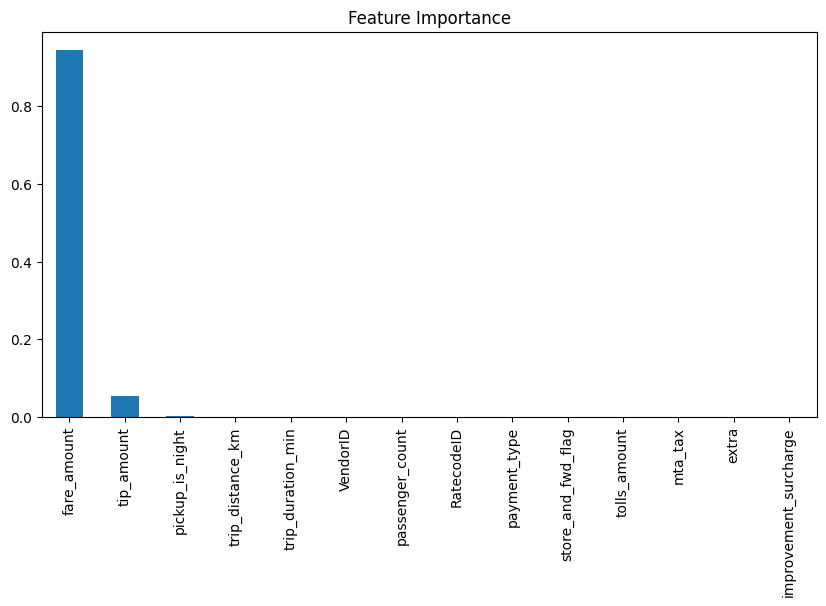

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("Feature Importance")
plt.show()


In [94]:
import joblib

# Save the model
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [95]:
# Load it later
model = joblib.load('random_forest_model.pkl')

In [96]:
model

RandomForestRegressor()

In [102]:
import pandas as pd

# Input data
input_data = {
    'VendorID': 2,
    'passenger_count': 6,
    'RatecodeID': 3,
    'store_and_fwd_flag': 0,        # 'N' -> 0, 'Y' -> 1
    'payment_type': 4,
    'extra': 0,
    'mta_tax': 0.5,
    'tip_amount': -1.218,
    'tolls_amount': 0,
    'improvement_surcharge': 0.3,
    'trip_distance_km': 1.71,
    'trip_duration_min': 1.55,
    'fare_amount': 8.72,
    'pickup_is_night': 1
}

# Convert to DataFrame
new_input_df = pd.DataFrame([input_data])

# Reorder columns to match the training data
new_input_df = new_input_df[x_train.columns]

# Predict total_amount
predicted_total_amount = model.predict(new_input_df)

print(f"Predicted total_amount: {predicted_total_amount[0]}")

Predicted total_amount: 1.7107699452824547
